#Plotting sigmoid

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

$S_{w,B}(x) = \frac{1}{e^{-(wx+b)}}$

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
w=1  #@param {type: "slider", min: -2, max: 2}
b=10
X=np.linspace(-40,40,100)
Y=sigmoid(X,w,b)

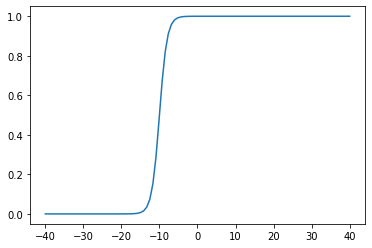

In [45]:
plt.plot(X,Y)
plt.show()

$sig_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1*x_1+w_2*x_2+b)}}$

In [0]:
from mpl_toolkits import mplot3d

In [0]:
def sigmoid_2(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
X1=np.linspace(-100,100,100)
X2=np.linspace(-100,100,100)

XX1, XX2 = np.meshgrid(X1,X2)
w1 = 1
w2 = 1
b = 2
Y = sigmoid_2(XX1,XX2,w1,w2,b)

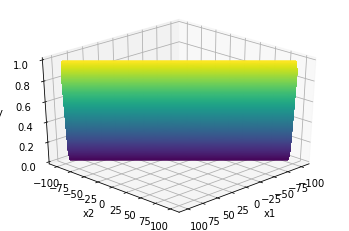

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30, 45)


#Compute Loss for a given dataset

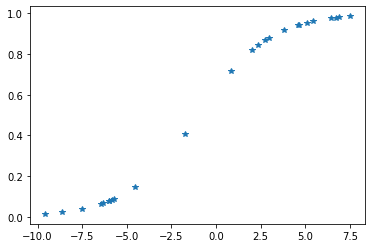

In [50]:
X = np.random.random(25)*20-10
wun = .5
bun = .5
Y = sigmoid(X, wun, bun)
plt.plot(X,Y,'*')
plt.show()

In [0]:
def sig_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
  return loss

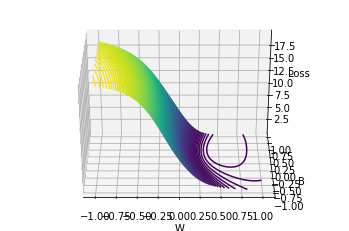

In [52]:
w = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)

WW,BB = np.meshgrid(w,b)
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = sig_loss(X,Y,WW[i,j],BB[i,j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss, 200, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss');
ax.view_init(30, 270)


In [0]:
class SigmoidNeuron :
  def __init__(self):
    self.b=None
    self.w=None

  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w (self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1 - y_pred)*x

  def grad_b (self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1 - y_pred)

  def fit(self,X,Y,epochs=1,learning_rate=.25,initialize=True,display_loss=False):
    if initialize :
      self.w = np.random.randn(1,X.shape[1]);
      self.b = 0
    if display_loss:
      Loss = []
    for i in range(epochs):
      dw=0.0;
      db=0.0;
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
        #print('in for')
      if display_loss:
        y_pred = self.sigmoid(self.perceptron(X))
        Loss.append(mean_squared_error(Y,y_pred))
      self.w -= learning_rate*dw
      self.b -= learning_rate*db
    if display_loss:
      plt.plot(Loss)
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)


#plotting gradient

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.array([X1[i],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))

  ax.contour(XX1,XX2,YY,cmap='viridis',alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y)
  ax.plot

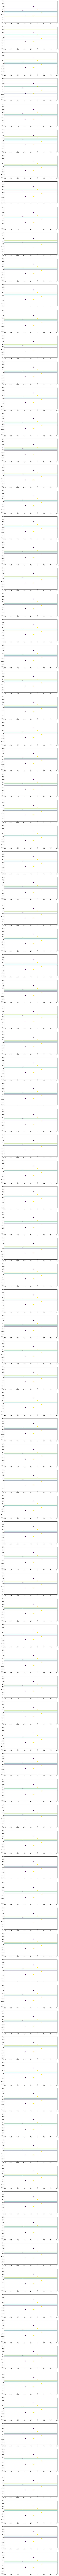

In [55]:
X = np.array([[1,2],[2,4],[4,8],[8,16]])
Y = np.array([0,0,1,1])

X = np.array([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = np.array([1,1,1,0,0,0])

sn = SigmoidNeuron()

sn.fit(X,Y,1,.25,True)
N=100
plt.figure(figsize=(10,N*5))
for i in range(N):
  #print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,1,False)


In [0]:
data = load_breast_cancer()

In [0]:
X = np.array(data.data)
Y = np.array(data.target)

#Plotting Loss

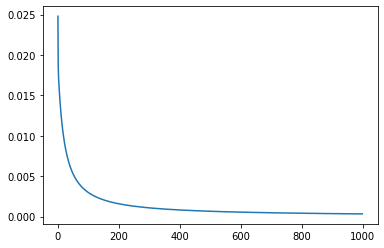

In [58]:
X = np.array([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = np.array([1,1,1,0,0,0])

sn = SigmoidNeuron()
sn.fit(X,Y,epochs=1000,learning_rate=.25,initialize=True,display_loss=True)


In [59]:
!wget https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv

--2020-04-29 04:08:03--  https://raw.githubusercontent.com/likhitha9reddy/PadhAI/master/mobile_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14044 (14K) [text/plain]
Saving to: ‘mobile_cleaned.csv.2’

mobile_cleaned.csv. 100%[===================>]  13.71K  --.-KB/s    in 0.007s  

2020-04-29 04:08:03 (1.89 MB/s) - ‘mobile_cleaned.csv.2’ saved [14044/14044]



In [60]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0
